# **Traffic Sign Image Classification**

#What is Traffic Signs Recognition?
There are several different types of traffic signs like speed limits, no entry, traffic signals, turn left or right, children crossing, no passing of heavy vehicles, etc. Traffic signs classification is the process of identifying which class a traffic sign belongs to.

#Traffic Signs Recognition – About the Python Project
In this Python project example, we will build a deep neural network model that can classify traffic signs present in the image into different categories. With this model, we are able to read and understand traffic signs which are a very important task for all autonomous vehicles.

#The Dataset of Python Project

For this project, we are using the public dataset available at Kaggle:

Traffic Signs Dataset

The dataset contains more than 50,000 images of different traffic signs. It is further classified into 43 different classes. The dataset is quite varying, some of the classes have many images while some classes have few images. The size of the dataset is around 300 MB. The dataset has a train folder which contains images inside each class and a test folder which we will use for testing our model.

Our approach to building this traffic sign classification model is discussed in eight steps:

1)Download and Imports

2)Loading Dataset (Traffic Signs Images)

3)Data Splitting and conversion

4)Creating CNN Model and Compiling the Model

5)Training the Model

6)Visualizing the performance of the Model during Training Phase

7)Loading Test Dataset and Evaluating the Model

8)Saving the Model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Download and Imports

In [ ]:
# Fundamental classes
import numpy as np
import pandas as pd
import tensorflow as tf
import os

# Image related
import cv2
from PIL import Image

# For ploting
import matplotlib.pyplot as plt

# For the model and it's training
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

Our ‘train’ folder contains 43 folders each representing a different class. The range of the folder is from 0 to 42. With the help of the OS module, we iterate over all the classes and append images and their respective labels in the data and labels list.

The PIL library is used to open image content into an array.

# 2. Loading Dataset (Traffic Signs Images)

In [ ]:
# Setting variables for later use
data = []
labels = []
classes = 43
cur_path = os.getcwd()

# Retrieving the images and their labels
for i in range(classes):
    path = os.path.join('/content/drive/MyDrive/Datasets/GTSRB - German Traffic Sign Recognition Benchmark/','Train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

Finally, we have stored all the images and their labels into lists (data and labels).

We need to convert the list into numpy arrays for feeding to the model.

# 3. Data Splitting and conversion

In [ ]:
# Checking data shape
print(data.shape, labels.shape)

# Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Displaying the shape after the split
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39210, 30, 30, 3) (39210,)
(31368, 30, 30, 3) (7842, 30, 30, 3) (31368,) (7842,)


The shape of data is (39209, 30, 30, 3) which means that there are 39,209 images of size 30×30 pixels and the last 3 means the data contains colored images (RGB value).

With the sklearn package, we use the train_test_split() method to split training and testing data.

From the keras.utils package, we use to_categorical method to convert the labels present in y_train and t_test into one-hot encoding.

# 4. Creating CNN Model and Compiling the Model

In [ ]:
# Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#M odel display
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

To classify the images into their respective categories, we will build a CNN model (Convolutional Neural Network). CNN is best for image classification purposes.

The architecture of our model is:

* 2 Conv2D layer (filter=32, kernel_size=(5,5),activation=”relu”)
* MaxPool2D layer ( pool_size=(2,2))


* Dropout layer (rate=0.25)

* 2 Conv2D layer (filter=64, kernel_size=(3,3), activation=”relu”)

* MaxPool2D layer ( pool_size=(2,2))

* Dropout layer (rate=0.25)
* Flatten layer to squeeze the layers into 1 dimension
Dense Fully connected layer (256 nodes, activation=”relu”)


* Dropout layer (rate=0.5)


* Dense layer (43 nodes, activation=”softmax”)


We compile the model with Adam optimizer which performs well and loss is “categorical_crossentropy” because we have multiple classes to categorise.

# 5. Training the Model

In [ ]:
# Training the Model
with tf.device('/GPU:0'):
    epochs = 15
    history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/15
981/981 [==============================] - 21s 11ms/step - loss: 2.0527 - accuracy: 0.4716 - val_loss: 0.6615 - val_accuracy: 0.8430
Epoch 2/15
981/981 [==============================] - 10s 10ms/step - loss: 0.9490 - accuracy: 0.7176 - val_loss: 0.3491 - val_accuracy: 0.9026
Epoch 3/15
981/981 [==============================] - 11s 11ms/step - loss: 0.7417 - accuracy: 0.7770 - val_loss: 0.2584 - val_accuracy: 0.9295
Epoch 4/15
981/981 [==============================] - 10s 10ms/step - loss: 0.6572 - accuracy: 0.8005 - val_loss: 0.2577 - val_accuracy: 0.9274
Epoch 5/15
981/981 [==============================] - 10s 11ms/step - loss: 0.6004 - accuracy: 0.8165 - val_loss: 0.2119 - val_accuracy: 0.9343
Epoch 6/15
981/981 [==============================] - 10s 11ms/step - loss: 0.5512 - accuracy: 0.8323 - val_loss: 0.1717 - val_accuracy: 0.9486
Epoch 7/15
981/981 [==============================] - 10s 10ms/step - loss: 0.5286 - accuracy: 0.8364 - val_loss: 0.1541 - val_accuracy:

After building the model architecture, we then train the model using model.fit(). I tried with batch size 32 and 64. Our model performed better with 64 batch size. And after 15 epochs the accuracy was stable.

Our model got a 95% accuracy on the training dataset.

# 6. Visualizing the performance of the Model during Training Phase

With matplotlib, we plot the graph for accuracy and the loss.

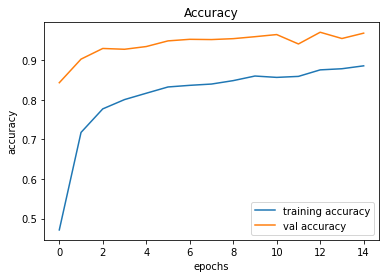

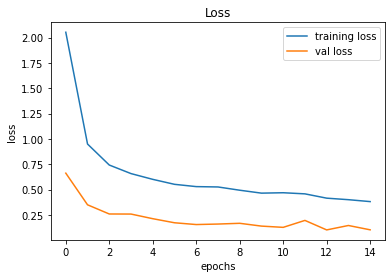

In [ ]:
# Plotting performance graphs
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# 7. Loading Test Dataset and Evaluating the Model

In [ ]:
# testing accuracy on test dataset
from sklearn.metrics import accuracy_score

# Importing the test dataset
y_test = pd.read_csv('/content/drive/MyDrive/Datasets/GTSRB - German Traffic Sign Recognition Benchmark/Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

# Retreiving the images
with tf.device('/GPU:0'):
    for img in imgs:
        image = Image.open('/content/drive/MyDrive/Datasets/GTSRB - German Traffic Sign Recognition Benchmark/'+img)
        image = image.resize([30, 30])
        data.append(np.array(image))

X_test=np.array(data)

with tf.device('/GPU:0'):
    pred = np.argmax(model.predict(X_test), axis=-1)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))


0.9223277909738717


Our dataset contains a test folder and in a test.csv file, we have the details related to the image path and their respective class labels. We extract the image path and labels using pandas. Then to predict the model, we have to resize our images to 30×30 pixels and make a numpy array containing all image data. From the sklearn.metrics, we imported the accuracy_score and observed how our model predicted the actual labels. We achieved a 92% accuracy in this model.

# 8. Savinng the Model

In [ ]:
# Saving the Model
model.save('traffic_classifier.h5')

In the end, we are going to save the model that we have trained using the Keras model.save() function.

# **Summary**
In this Python project with source code, we have successfully classified the traffic signs classifier with 92% accuracy and also visualized how our accuracy and loss changes with time, which is pretty good from a simple CNN model.